Titile: Evaluation of Stock Prediction Models using Fully Connected Feed Forward Neural Network and Adaptive Variants of Recursive Neural Networks

Author: Soumyendu Sarkar : http://www.linkedin.com/in/soumyendusarkar

Source Code: https://github.com/shoumo95

Data Source: https://quantquote.com/historical-stock-data

COMPSCI X433.3 Project:

Soumyendu Sarkar
 
Project Objective
Evaluate models to Predict future market behavior of equities from historic data using Machine Learning techniques.
 
Methods :

Multiple models will be attempted for this project, both requiring the use of Python and Machine Learning Packages and Frameworks.

[Soumyendu] Normalize data for zero mean and unit variance with logarithmic scaling of returns and data frame construction for optimized Neural Network training with back propagation.

·       Develop Python Code to Implement, Train and Test Models for Prediction: 

[Soumyendu]   Recurrent Neural Network implementation using Tensorflow framework APIs in Python and a Baseline model of 3 Layer Feed Forward Neural Network for comparison.

·       Evaluate Model Performance 

[Soumyendu]


Data Preparation
- Data Source research and identification (free part of QuantQuote database )
- Importing decade long stock data of the S&P 500 companies
- Cleaning and Normalizing data with zero mean, unit variance and logarithmic scaling for normal distribution
- Processing and Separating data into Input Data (the intra-day price fluctuations) and Expected Output Data (discrete categorized classification values for price gain over consecutive days )
- Forming Data Frames for Training and Testing for Neural Network

Code for Two Distinct Neural Networks for Comparison
- Code for Fully Connected Feed Forward Neural Network classifier using low level Tensorflow Framework API
- Code for Attention Adaptation of Multilayer (2x) Recurrent Neural Networks (100x NN lookback) with LSTM / GRU Memory Optimized Cells using low level Tensorflow Framework API. This follows latest publication and enhancement in Recurrent Neural Networks.
- Accelerated Linear Algebra optimization for faster code execution with XLA JIT (Just in time compilation) directives
- Both these codes uses low level Tensorflow API to facilitate usage of advanced Tensorflow framework features with embedding and model structure refinements

Model Visualization and Tensorboard Embeddings
- Tensorboard code embedding for Graphical Model Visualization and Data visualization 

Analysis and Result Visualization
- Diagnostics and Evaluation with Graphical presentation of the effectiveness of the Model
- Confusion Matrix and Accuracy, Precision, Sensitivity and Specificity
- The Graph demonstrates the effectiveness of both the Neural Networks in making daily trading decisions, scored against random buys and sells
- Several measures of effectiveness in decision making


Data Source :

QuantQuote Free Historical Stock Data
This collection of daily resolution data goes back to 1998 for all symbols currently active in the S&P500. It is updated quarterly, the last update was 07/31/2013. 

QuantQuote Free Daily Data has several advantages not found elsewhere:

Full split/dividend adjustments for OHLCV
Single zip file makes downloading ~500 symbols a one step process
QuantQuote data quality means errors in many free sources (such as Yahoo) are not present.
For format information, please consult our minute resolution data documentation.

Reference :
https://quantquote.com/historical-stock-data


Data Preparation

1. Calculate the log return between two points. Assumption is returns are log-normally distributed. 
2. Using zscore  to map a pandas series to make it have mean 0 and variance 1, to normalize the data.


In [1]:
import pandas as pd
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(os.listdir('./daily')[0])

table_qep.csv


In [3]:
datapath = './daily'
filepath = os.path.join(datapath,os.listdir('./daily')[0])

In [4]:
print(filepath)

./daily/table_qep.csv


In [5]:
import re
ticker_regex = re.compile('.+_(?P<ticker>.+)\.csv')
get_ticker =lambda x :ticker_regex.match(x).groupdict()['ticker']
print(filepath,get_ticker(filepath))

./daily/table_qep.csv qep


In [6]:
ret = lambda x,y: log(y/x) #Log return 
zscore = lambda x:(x -x.mean())/x.std() # zscore

In [7]:
D = pd.read_csv(filepath,header=None,names=['UNK','o','h','l','c','v']) #Load the dataframe with headers

In [8]:
D.head() #Lets peack at it

,UNK,o,h,l,c,v
20100701,0,30.2711,30.7971,29.0305,29.1397,2407928.706
20100702,0,29.2786,29.7352,28.6633,28.8320,2997759.606
20100706,0,29.3878,29.3878,27.7998,27.9090,2136222.897
20100707,0,28.2960,29.2687,27.6906,29.1198,2069802.765
20100708,0,29.7252,30.8567,29.6855,30.0031,1988857.584


The processed data will be the fluctation of prices. The prices are normalized to log return of the various prices followed by zscore. 
Ticker will be extraccted from the file and added to the column.

In [9]:
def make_inputs(filepath):
    D = pd.read_csv(filepath,header=None,names=['UNK','o','h','l','c','v']) #Load the dataframe with headers
    D.index = pd.to_datetime(D.index,format='%Y%m%d') # Set the indix to a datetime
    Res = pd.DataFrame()
    ticker = get_ticker(filepath)

    Res['c_2_o'] = zscore(ret(D.o,D.c))
    Res['h_2_o'] = zscore(ret(D.o,D.h))
    Res['l_2_o'] = zscore(ret(D.o,D.l))
    Res['c_2_h'] = zscore(ret(D.h,D.c))
    Res['h_2_l'] = zscore(ret(D.l,D.h))
    Res['c1_c0'] = ret(D.c,D.c.shift(-1)).fillna(0) #Tommorows return 
    Res['vol'] = zscore(D.v)
    Res['ticker'] = ticker
    return Res
Res = make_inputs(filepath)
print(type(Res))

<class 'pandas.core.frame.DataFrame'>


In [10]:
Res.head() # Checking data frame

,c_2_o,h_2_o,l_2_o,c_2_h,h_2_l,c1_c0,vol,ticker
2010-07-01,-1.903707,0.190696,-1.780643,-2.994340,1.836564,-0.010616,1.197635,qep
2010-07-02,-0.758547,0.057368,-0.348498,-1.174928,0.376646,-0.032537,1.942951,qep
2010-07-06,-2.586059,-1.119977,-2.733060,-2.720119,1.606555,0.042469,0.854305,qep
2010-07-07,1.462571,1.451465,-0.375473,0.739043,1.598386,0.029882,0.770376,qep
2010-07-08,0.485175,1.722356,1.034700,-0.967330,0.506006,0.006266,0.668093,qep


## Processing all tickers to generate data framest

In [11]:
Final = pd.DataFrame()
for f in os.listdir(datapath):
    filepath = os.path.join(datapath,f)
    if filepath.endswith('.csv'):
        Res = make_inputs(filepath)
        Final = Final.append(Res)
print('This will take a minute')

This will take a minute


In [12]:
Final.head()

,c_2_o,h_2_o,l_2_o,c_2_h,h_2_l,c1_c0,vol,ticker
2010-07-01,-1.903707,0.190696,-1.780643,-2.994340,1.836564,-0.010616,1.197635,qep
2010-07-02,-0.758547,0.057368,-0.348498,-1.174928,0.376646,-0.032537,1.942951,qep
2010-07-06,-2.586059,-1.119977,-2.733060,-2.720119,1.606555,0.042469,0.854305,qep
2010-07-07,1.462571,1.451465,-0.375473,0.739043,1.598386,0.029882,0.770376,qep
2010-07-08,0.485175,1.722356,1.034700,-0.967330,0.506006,0.006266,0.668093,qep


In [13]:
pivot_columns = Final.columns[:-1]
P = Final.pivot_table(index=Final.index,columns='ticker',values=pivot_columns) # Make a pivot table from the data

In [14]:
P.head()

c_2_o                                                             \
ticker         a        aa      aapl abbv       abc       abt       ace acn   
1998-01-02   NaN -0.017649  6.991394  NaN  0.047250  1.845516 -0.601609 NaN   
1998-01-05   NaN  0.373488 -1.224062  NaN -0.160945  0.031659 -0.234577 NaN   
1998-01-06   NaN -0.718569  6.857266  NaN -1.102853 -0.473164  0.452262 NaN   
1998-01-07   NaN  0.980669 -3.007557  NaN  0.553079  0.746779  0.137372 NaN   
1998-01-08   NaN -1.828950  1.388888  NaN  0.488170 -0.221620 -0.484264 NaN   

                               ...       vol                                \
ticker           act      adbe ...        xl      xlnx       xom      xray   
1998-01-02 -0.911471 -0.375461 ... -0.676802  1.391497 -1.045626 -1.147952   
1998-01-05  2.090086  0.791331 ... -0.621025  1.019607 -0.615370 -0.556684   
1998-01-06 -1.239961  1.451409 ... -0.634169  0.020195 -0.527923 -1.131583   
1998-01-07 -0.878292 -0.534781 ... -0.616242  1.023705 -0.134130 -0.329006   
1998-01-08  1.300492  0.538778 ... -0.655003  0.645285 -0.907375 -1.066107   

                                                            
ticker           xrx xyl      yhoo       yum      zion zmh  
1998-01-02 -0.817355 NaN -0.368713 -0.678763 -0.724482 NaN  
1998-01-05 -0.757660 NaN  0.064841  0.980283 -0.735275 NaN  
1998-01-06 -0.629732 NaN  0.150071  1.697887 -0.683202 NaN  
1998-01-07 -0.504232 NaN -0.463651  0.515268 -0.635858 NaN  
1998-01-08 -0.560549 NaN -0.157777  0.235907 -0.605092 NaN  

[5 rows x 3500 columns]

### Flattened pivot
source http://stackoverflow.com/questions/14507794/python-pandas-how-to-flatten-a-hierarchical-index-in-columns
P will be a flattened dataframe of all the entries for each stock, one day per row

In [15]:
mi = P.columns.tolist()

In [16]:
new_ind = pd.Index(e[1] +'_' + e[0] for e in mi)

In [17]:
P.columns = new_ind
P = P.sort_index(axis=1) # Sort by columns

In [18]:
P.head()

,a_c1_c0,a_c_2_h,a_c_2_o,a_h_2_l,a_h_2_o,a_l_2_o,a_vol,aa_c1_c0,aa_c_2_h,aa_c_2_o,...,zion_h_2_o,zion_l_2_o,zion_vol,zmh_c1_c0,zmh_c_2_h,zmh_c_2_o,zmh_h_2_l,zmh_h_2_o,zmh_l_2_o,zmh_vol
1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017390,0.670259,-0.017649,...,0.246401,0.710284,-0.724482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.022601,0.462520,0.373488,...,0.127875,0.710284,-0.735275,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001693,-0.088471,-0.718569,...,-0.677287,-1.264514,-0.683202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.042290,1.002099,0.980669,...,-0.677287,-1.175835,-0.635858,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.024094,-2.074267,-1.828950,...,-0.202411,-2.278200,-0.605092,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
clean_and_flat = P.dropna(1)

In [20]:
target_cols = list(filter(lambda x: 'c1_c0' in x, clean_and_flat.columns.values))
input_cols  = list(filter(lambda x: 'c1_c0' not in x, clean_and_flat.columns.values))

In [21]:
len(target_cols)

388

In [22]:
InputDF = clean_and_flat[input_cols][:3900]
TargetDF = clean_and_flat[target_cols][:3900]

In [23]:
InputDF.head()

,aa_c_2_h,aa_c_2_o,aa_h_2_l,aa_h_2_o,aa_l_2_o,aa_vol,aapl_c_2_h,aapl_c_2_o,aapl_h_2_l,aapl_h_2_o,...,yum_h_2_l,yum_h_2_o,yum_l_2_o,yum_vol,zion_c_2_h,zion_c_2_o,zion_h_2_l,zion_h_2_o,zion_l_2_o,zion_vol
1998-01-02,0.670259,-0.017649,-0.934572,-0.735743,0.435162,-0.761999,1.019696,6.991394,6.649433,8.707782,...,0.416891,-0.322652,-0.855900,-0.678763,0.224681,0.419702,-0.312078,0.246401,0.710284,-0.724482
1998-01-05,0.462520,0.373488,-0.732608,0.061561,0.900313,-0.566965,-0.984079,-1.224062,2.242381,-0.763862,...,1.360326,-0.644971,-2.369968,0.980283,0.673049,0.719822,-0.392667,0.127875,0.710284,-0.735275
1998-01-06,-0.088471,-0.718569,-0.720530,-0.966978,-0.014696,-0.665787,-3.590776,6.857266,13.046850,12.876073,...,0.539951,-0.942530,-1.652489,1.697887,0.122250,-0.486186,0.393348,-0.677287,-1.264514,-0.683202
1998-01-07,1.002099,0.980669,-0.569841,0.386474,0.996909,-0.708534,-4.732173,-3.007557,3.126659,0.308601,...,0.954036,1.362584,0.219573,0.515268,-0.524524,-1.069686,0.333468,-0.677287,-1.175835,-0.635858
1998-01-08,-2.074267,-1.828950,0.917882,-0.503345,-1.501386,-0.784476,-0.790227,1.388888,2.631329,2.667391,...,0.768144,-0.263050,-1.233393,0.235907,-2.687743,-2.603061,1.400707,-0.202411,-2.278200,-0.605092


In [24]:
TargetDF.head()

,aa_c1_c0,aapl_c1_c0,abc_c1_c0,abt_c1_c0,ace_c1_c0,act_c1_c0,adbe_c1_c0,adi_c1_c0,adm_c1_c0,adp_c1_c0,...,x_c1_c0,xel_c1_c0,xl_c1_c0,xlnx_c1_c0,xom_c1_c0,xray_c1_c0,xrx_c1_c0,yhoo_c1_c0,yum_c1_c0,zion_c1_c0
1998-01-02,0.017390,-0.015503,-0.016078,0.004586,-0.006547,0.047809,0.012268,0.038082,0.000000,0.012420,...,-0.006149,-0.010796,0.004856,-0.019672,-0.011189,-0.029680,0.015005,-0.054224,-0.023887,0.019158
1998-01-05,-0.022601,0.168686,-0.018823,-0.016672,0.007916,-0.005666,0.035934,-0.033379,-0.017727,0.002139,...,-0.012078,-0.012148,-0.003001,-0.006644,-0.038411,-0.002427,-0.008338,0.016891,-0.040999,-0.010841
1998-01-06,0.001693,-0.082508,0.010072,0.005546,0.005239,-0.022684,-0.016370,-0.043925,0.062917,-0.013562,...,0.026259,-0.008895,-0.017745,-0.044161,0.030221,-0.006268,-0.034613,-0.001095,0.000000,-0.029190
1998-01-07,-0.042290,0.034934,0.005435,0.015691,-0.017187,0.020888,0.010469,0.002260,-0.016930,-0.004169,...,0.000000,0.002141,-0.014475,0.005005,-0.020771,-0.006658,-0.020850,0.006869,-0.040050,-0.083267
1998-01-08,-0.024094,0.010464,-0.031078,-0.011075,0.005301,-0.056066,-0.026867,-0.060529,-0.014034,-0.017884,...,-0.083382,-0.008964,-0.018331,-0.037006,-0.022243,-0.049740,-0.040273,-0.039685,0.007296,-0.037270


In [25]:
corrs = TargetDF.corr()

## Setting Targets
We now have an our inputs and targets, kind of. 
InputsDF has all the inputs we want to predict. Targets DF has the return of each stock each day. 
For starters, lets give a simpler target to predict than the reuturn of each stock, since we don't have much data. 


We're going to label the targets as either up (1) down (-1) or flat (0) days.
The top chart shows what would happen if we bought 1 dollar of each stock each day
The bottom chart shows what would happen if we longed the whole basket on (1) days, shorted it on down days (-1) and ignored it on  (0) days. 
You can see that this is a valuable target to predict.

In [26]:
num_stocks = len(TargetDF.columns)

In [27]:
TotalReturn = ((1-exp(TargetDF)).sum(1))/num_stocks # If i put one dollar in each stock at the close, this is how much I'd get back

In [28]:
def labeler(x):
    if x>0.0029:
        return 1
    if x<-0.00462:
        return -1
    else:
        return 0

In [29]:
Labeled = pd.DataFrame()
Labeled['return'] = TotalReturn
Labeled['class'] = TotalReturn.apply(labeler,1)
Labeled['multi_class'] = pd.qcut(TotalReturn,11,labels=range(11))

In [30]:
pd.qcut(TotalReturn,5).unique()

[(-0.00301, 0.00119], (0.00741, 0.0999], (0.00119, 0.00741], [-0.108, -0.00877], (-0.00877, -0.00301]]
Categories (5, object): [[-0.108, -0.00877] < (-0.00877, -0.00301] < (-0.00301, 0.00119] < (0.00119, 0.00741] < (0.00741, 0.0999]]

In [31]:
def labeler_multi(x):
    if x>0.0029:
        return 1
    if x<-0.00462:
        return -1
    else:
        return 0

In [32]:
Labeled['class'].value_counts()

 1    1301
 0    1301
-1    1298
Name: class, dtype: int64

In [33]:
Labeled['max_return'] = Labeled['class'] * Labeled['return']

In [34]:
Labeled

,return,class,multi_class,max_return
1998-01-02,-0.000101,0,6,-0.000000
1998-01-05,0.008144,1,8,0.008144
1998-01-06,0.005501,1,8,0.005501
1998-01-07,0.006905,1,8,0.006905
1998-01-08,0.031674,1,10,0.031674
1998-01-09,-0.002883,0,4,-0.000000
1998-01-12,-0.017040,-1,0,0.017040
1998-01-13,-0.007591,-1,2,0.007591
1998-01-14,0.004450,1,7,0.004450
1998-01-15,-0.009007,-1,2,0.009007


In [35]:
len(Labeled)

3900

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f87ca432780>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f87ca360588>], dtype=object)

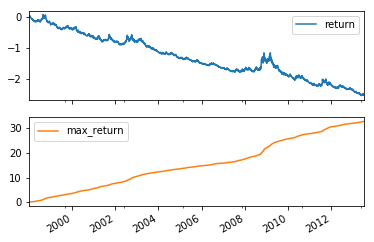

In [36]:
Labeled[['return','max_return']].cumsum().plot(subplots=True)

# Making a baseline

In [37]:
from sklearn import linear_model
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
logreg = linear_model.LogisticRegression(C=1e5)

In [39]:
test_size=600

In [40]:
from sklearn.metrics import classification_report,confusion_matrix


## Baseline Fully Connected Feed Forward Neural Network
Baseline feed forward network for benchmark.

In [41]:
import tensorflow as tf
from  tensorflow.contrib.learn.python.learn.estimators.dnn  import DNNClassifier
from tensorflow.contrib.layers import real_valued_column

In [42]:
test_size=600

In [43]:
Labeled['tf_class'] = Labeled['multi_class']
num_features = len(InputDF.columns)
dropout=0.2
hidden_1_size = 1000
hidden_2_size = 250
logpath2 = '/tmp/fc_logs/example'
num_classes = Labeled.tf_class.nunique()
#NUM_EPOCHS=200 Just speeding up
NUM_EPOCHS=100
BATCH_SIZE=50
learning_rate=0.0001

In [44]:
train = (InputDF[:-test_size].values,Labeled.tf_class[:-test_size].values)
val = (InputDF[-test_size:].values,Labeled.tf_class[-test_size:].values)
NUM_TRAIN_BATCHES = int(len(train[0])/BATCH_SIZE)
NUM_VAL_BATCHES = int(len(val[1])/BATCH_SIZE)

In [45]:
len(InputDF)

3900

In [46]:
class Model():
    def __init__(self):
        global_step = tf.contrib.framework.get_or_create_global_step()
        self.input_data = tf.placeholder(dtype=tf.float32,shape=[None,num_features])
        self.target_data = tf.placeholder(dtype=tf.int32,shape=[None])
        self.dropout_prob = tf.placeholder(dtype=tf.float32,shape=[])
        self.summaries = tf.summary.merge_all()
        with tf.variable_scope("ff"):
            droped_input = tf.nn.dropout(self.input_data,keep_prob=self.dropout_prob)
            
            layer_1 = tf.contrib.layers.fully_connected(
                num_outputs=hidden_1_size,
                inputs=droped_input,
            )
            layer_2 = tf.contrib.layers.fully_connected(
                num_outputs=hidden_2_size,
                inputs=layer_1,
            )
            self.logits = tf.contrib.layers.fully_connected(
                num_outputs=num_classes,
                activation_fn =None,
                inputs=layer_2,
            )
        with tf.variable_scope("loss"):
            
            self.losses = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=self.logits,labels=self.target_data)
            mask = (1-tf.sign(1-self.target_data)) #No credit for flat days
            mask = tf.cast(mask,tf.float32)
            self.loss = tf.reduce_sum(self.losses)
        
        with tf.name_scope("train"):
          opt = tf.train.AdamOptimizer(learning_rate)
          gvs = opt.compute_gradients(self.loss)
          self.train_op = opt.apply_gradients(gvs, global_step=global_step)
        
        with tf.name_scope("predictions"):
            self.probs = tf.nn.softmax(self.logits)
            self.predictions = tf.argmax(self.probs, 1)
            correct_pred = tf.cast(tf.equal(self.predictions, tf.cast(self.target_data,tf.int64)),tf.float64)
            self.accuracy = tf.reduce_mean(correct_pred)

In [47]:
tb_writer = tf.summary.FileWriter(logpath2)

In [48]:
if tf.gfile.Exists(logpath2):
   tf.gfile.DeleteRecursively(logpath2) 

In [49]:
with tf.Graph().as_default():
    model = Model()
    input_ = train[0]
    target = train[1]

    config = tf.ConfigProto()
    jit_level = tf.OptimizerOptions.ON_1
    config.graph_options.optimizer_options.global_jit_level = jit_level

    with tf.Session(config=config) as sess:
        init = tf.initialize_all_variables()
        sess.run([init])
        epoch_loss =0
        summary_writer = tf.summary.FileWriter(logpath2, graph=tf.get_default_graph())
        for e in range(NUM_EPOCHS):
            if epoch_loss >0 and epoch_loss <1:
                break
            epoch_loss =0
            for batch in range(0,NUM_TRAIN_BATCHES):
                
                start = batch*BATCH_SIZE
                end = start + BATCH_SIZE 
                feed = {
                    model.input_data:input_[start:end],
                    model.target_data:target[start:end],
                    model.dropout_prob:0.9
                            }
                
                _,loss,acc = sess.run(
                    [
                        model.train_op,
                        model.loss,
                        model.accuracy,
                    ]
                    ,feed_dict=feed
                )
                epoch_loss+=loss
            print('step - {0} loss - {1} accr - {2}'.format((1+batch+NUM_TRAIN_BATCHES*e),epoch_loss,acc))
            # Write logs after every epoch
            tb_loss = tf.Summary()
            tb_loss.value.add(
                tag='ep-loss', simple_value=epoch_loss)
            tb_writer.add_summary(tb_loss, (e))
            tb_acc = tf.Summary()
            tb_acc.value.add(
                tag='ep-accuracy', simple_value=acc)
            tb_writer.add_summary(tb_acc, (e))
            tb_writer.flush()
                
        
        print('done training')
        final_preds =np.array([])
        final_probs =None
        for batch in range(0,NUM_VAL_BATCHES):
            
                start = batch*BATCH_SIZE
                end = start + BATCH_SIZE 
                feed = {
                    model.input_data:val[0][start:end],
                    model.target_data:val[1][start:end],
                    model.dropout_prob:1
                            }
                
                acc,preds,probs = sess.run(
                    [
                        model.accuracy,
                        model.predictions,
                        model.probs
                    ]
                    ,feed_dict=feed
                )
                print(acc)
                final_preds = np.concatenate((final_preds,preds),axis=0)
                if final_probs is None:
                    final_probs = probs
                else:
                    final_probs = np.concatenate((final_probs,probs),axis=0)
                tb_acc = tf.Summary()
                tb_acc.value.add(
                    tag='test_accuracy', simple_value=acc)
                tb_writer.add_summary(tb_acc, batch)
                tb_writer.flush()

        prediction_conf = final_probs[np.argmax(final_probs,1)]
        
        print ("Run the command line:\n")
        print("--> tensorboard --logdir=/tmp/fc_logs --port=6008")
        print("\nThen open http://0.0.0.0:6008/ into your web browser")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
step - 66 loss - 8476.85726928711 accr - 0.26
step - 132 loss - 6955.656211853027 accr - 0.2
step - 198 loss - 5977.432769775391 accr - 0.26
step - 264 loss - 5110.788524627686 accr - 0.4
step - 330 loss - 4245.8157024383545 accr - 0.68
step - 396 loss - 3607.078588485718 accr - 0.74
step - 462 loss - 3002.383544921875 accr - 0.8
step - 528 loss - 2545.9910039901733 accr - 0.82
step - 594 loss - 2186.544906616211 accr - 0.9
step - 660 loss - 1765.569980621338 accr - 0.86
step - 726 loss - 1636.0608968734741 accr - 0.92
step - 792 loss - 1484.5583610534668 accr - 0.88
step - 858 loss - 1364.3384790420532 accr - 0.72
step - 924 loss - 1345.0335240364075 accr - 0.88
step - 990 loss - 1055.7422652244568 accr - 0.94
step - 1056 loss - 898.1392440795898 accr - 0.86
step - 1122 loss - 685.99458360672 accr - 0.92
step - 1188 loss - 549.8827750682831 accr - 0.94
step - 1254 loss - 454.62357687950134 accr - 0.92
step - 132

In [50]:
Result = Labeled[-test_size:].copy()

In [51]:
Result['nn_pred'] = final_preds
Result['mod_nn_prod'] = list(map(lambda x: -1 if x <5 else 0 if x==5 else 1,final_preds))
Result['nn_ret'] = Result.mod_nn_prod*Result['return']

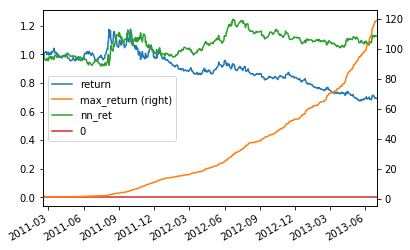

In [52]:
Res = (1+Result[-test_size:][['return','max_return','nn_ret']]).cumprod()
Res[0] =0
Res.plot(secondary_y='max_return')

In [53]:
print(confusion_matrix(Result['class'],Result['mod_nn_prod']))
print(classification_report(Result['class'],Result['mod_nn_prod']))

[[ 73  31  99]
 [ 59  32 109]
 [ 76  19 102]]
             precision    recall  f1-score   support

         -1       0.35      0.36      0.36       203
          0       0.39      0.16      0.23       200
          1       0.33      0.52      0.40       197

avg / total       0.36      0.34      0.33       600



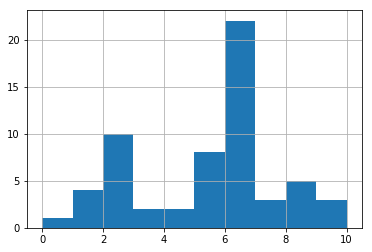

In [54]:
cm = pd.DataFrame(confusion_matrix(Result['multi_class'],Result['nn_pred']))
#sns.heatmap(cm.div(cm.sum(1)))
Result[Result.multi_class==6]['nn_pred'].hist()

In [55]:
print(classification_report(Result['multi_class'],Result['nn_pred']))

             precision    recall  f1-score   support

          0       0.36      0.15      0.22        52
          1       0.12      0.10      0.11        50
          2       0.13      0.18      0.15        60
          3       0.18      0.05      0.08        62
          4       0.15      0.12      0.13        50
          5       0.07      0.12      0.09        51
          6       0.13      0.37      0.20        60
          7       0.00      0.00      0.00        53
          8       0.08      0.09      0.09        54
          9       0.08      0.02      0.03        56
         10       0.18      0.15      0.17        52

avg / total       0.14      0.12      0.11       600



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87705057b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f876a1835f8>]], dtype=object)

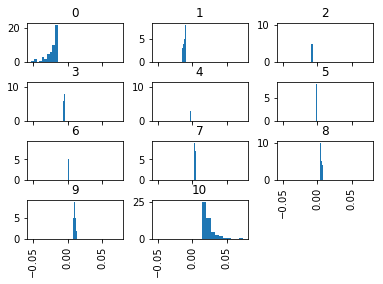

In [56]:
Result.hist(by='multi_class',column='return',sharex=True)

# Attention Recurrent Neural Network with MultiRNNCell LSTMs
In this section we'll make an rnn model that learns to take the past into account as well
This model is based on AttentionCellWrapper a novel approach described in the following publication https://arxiv.org/pdf/1409.0473v7.pdf titled "NEURAL MACHINE TRANSLATION BY JOINTLY LEARNING TO ALIGN AND TRANSLATE"


## Defining an rnn Network

In [72]:
from tensorflow.contrib.layers.python.layers.initializers import xavier_initializer

# Parameters
learning_rate = 0.0007
display_step = 1
logpath = '/tmp/rnn_logs/example'
rnn_num_units=100
multirnn_num_cells=2
attn_win_size=30
first_layer_size=1000
batch_size=50
num_of_train_batches = int(len(train[0])/batch_size)
num_of_test_batches = int(len(val[1])/batch_size)
#NUM_EPOCHS=200
NUM_EPOCHS=20
beta=0

In [73]:
class RNNModel():
    def __init__(self):
        global_step = tf.contrib.framework.get_or_create_global_step()
        self.input_data = tf.placeholder(dtype=tf.float32,shape=[batch_size,num_features], name='InputData')
        self.target_data = tf.placeholder(dtype=tf.int32,shape=[batch_size], name='LabelData')
        self.dropout_prob = tf.placeholder(dtype=tf.float32,shape=[], name='DropoutData')
        self.summaries = tf.summary.merge_all()
       
        def lstm_cell():
            return tf.contrib.rnn.BasicLSTMCell(rnn_num_units, forget_bias=0.0, state_is_tuple=False,
            reuse=tf.get_variable_scope().reuse)

        
        def makeGRUCells():
            at_cell = lstm_cell
            stacked_cell = tf.contrib.rnn.MultiRNNCell([at_cell() for _ in range(multirnn_num_cells)], state_is_tuple=False)
            attn_cell =tf.contrib.rnn.AttentionCellWrapper(cell=stacked_cell,attn_length=attn_win_size,state_is_tuple=False)
            return attn_cell
        
        self.gru_cell = makeGRUCells()
        self.zero_state = self.gru_cell.zero_state(1, tf.float32)
        self.start_state = tf.placeholder(dtype=tf.float32,shape=[1,self.gru_cell.state_size], name='StateData')

        with tf.variable_scope("feedfor",initializer=xavier_initializer(uniform=False)):
            droped_input = tf.nn.dropout(self.input_data,keep_prob=self.dropout_prob)
            
            layer_1 = tf.contrib.layers.fully_connected(
                num_outputs=first_layer_size,
                inputs=droped_input,
                
            )
            layer_2 = tf.contrib.layers.fully_connected(
                num_outputs=rnn_num_units,
                inputs=layer_1,
            )
        
        split_inputs = tf.reshape(droped_input,shape=[1,batch_size,num_features],name="reshape_l1") # Each item in the batch is a time step, iterate through them
        split_inputs = tf.unstack(split_inputs,axis=1,name="unstack")
        states =[]
        outputs =[]
        with tf.variable_scope("rnn",initializer=xavier_initializer(uniform=False)) as scope:
            state = self.start_state
            for i, inp in enumerate(split_inputs):
                if i >0:
                    scope.reuse_variables()
                
                output, state = self.gru_cell(inp, state)
                states.append(state)
                outputs.append(output)
        self.end_state = states[-1]
        outputs = tf.stack(outputs,axis=1) # Pack them back into a single tensor
        outputs = tf.reshape(outputs,shape=[batch_size,rnn_num_units])
        self.logits = tf.contrib.layers.fully_connected(
            num_outputs=num_classes,
            inputs=outputs,
            activation_fn=None
        )
            
        with tf.variable_scope("loss"):
            self.penalties =    tf.reduce_sum([beta*tf.nn.l2_loss(var) for var in tf.trainable_variables()])
            self.losses = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=self.target_data, logits=self.logits)
            self.loss = tf.reduce_sum(self.losses + beta*self.penalties)
            tf.summary.scalar('mloss', self.loss)
        
        with tf.name_scope("train_step"):
            opt = tf.train.AdamOptimizer(learning_rate)
            gvs = opt.compute_gradients(self.loss)
            self.train_op = opt.apply_gradients(gvs, global_step=global_step)
        
        with tf.name_scope("predictions"):
            probs = tf.nn.softmax(self.logits)
            self.predictions = tf.argmax(probs, 1)
            correct_pred = tf.cast(tf.equal(self.predictions, tf.cast(self.target_data,tf.int64)),tf.float64)
            self.accuracy = tf.reduce_mean(correct_pred)
            tf.summary.scalar("maccuracy", self.accuracy)
            


In [74]:
def variable_summaries(var):
   """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
   with tf.name_scope('summaries'):
     mean = tf.reduce_mean(var)
     tf.summary.scalar('mean', mean)
     with tf.name_scope('stddev'):
       stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
     tf.summary.scalar('stddev', stddev)
     tf.summary.scalar('max', tf.reduce_max(var))
     tf.summary.scalar('min', tf.reduce_min(var))
     tf.summary.histogram('histogram', var)

train_writer = tf.summary.FileWriter(logpath)
test_writer = tf.summary.FileWriter(logpath)


In [75]:
if tf.gfile.Exists(logpath):
   tf.gfile.DeleteRecursively(logpath) 

## Training the RNN

In [76]:
# Construct model and encapsulating all ops into scopes, making
# Tensorboard's Graph visualization more convenient
with tf.Graph().as_default():
    model = RNNModel()
    input_ = train[0]
    target = train[1]
# XLA
    config = tf.ConfigProto()
    jit_level = tf.OptimizerOptions.ON_1
    config.graph_options.optimizer_options.global_jit_level = jit_level

    with tf.Session(config=config) as sess:
        init = tf.initialize_all_variables()
        sess.run([init])
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logpath, graph=tf.get_default_graph())
        loss = 2000
        
        for e in range(NUM_EPOCHS):
            state = sess.run(model.zero_state)
            epoch_loss =0
            for batch in range(0,num_of_train_batches):
                start = batch*batch_size
                end = start + batch_size 
                feed = {
                    model.input_data:input_[start:end],
                    model.target_data:target[start:end],
                    model.dropout_prob:0.5,
                    model.start_state:state,
                    }
                (_,loss,acc,state) = sess.run(
                    [
                        model.train_op,
                        model.loss,
                        model.accuracy,
                        model.end_state
                    ]
                    ,feed_dict=feed
                )
                epoch_loss+=loss
                # Write logs at every iteration
                tb_loss = tf.Summary()
                tb_loss.value.add(
                    tag='loss', simple_value=epoch_loss)
                train_writer.add_summary(tb_loss, (e*num_of_train_batches+batch))
                tb_acc = tf.Summary()
                tb_acc.value.add(
                    tag='accuracy', simple_value=acc)
                train_writer.add_summary(tb_acc, (e*num_of_train_batches+batch))
                train_writer.add_summary(model.summaries, (e*num_of_train_batches+batch))
                train_writer.flush()
                
            print('step - {0} loss - {1} acc - {2}'.format((e),epoch_loss,acc))
            # Write logs at every iteration
            tb_loss = tf.Summary()
            tb_loss.value.add(
                tag='ep-loss', simple_value=epoch_loss)
            train_writer.add_summary(tb_loss, (e*num_of_train_batches+batch))
            tb_acc = tf.Summary()
            tb_acc.value.add(
                tag='ep-accuracy', simple_value=acc)
            train_writer.add_summary(tb_acc, (e*num_of_train_batches+batch))
            train_writer.flush()
#            print('step - {:4d} loss - {:.9f} acc - {:.9f}'.format((e),epoch_loss,acc))
        final_preds =np.array([])
        for batch in range(0,num_of_test_batches):
            start = batch*batch_size
            end = start + batch_size 
            feed = {
                model.input_data:val[0][start:end],
                model.target_data:val[1][start:end],
                model.dropout_prob:1,
                model.start_state:state
                }
            (acc,preds,state) = sess.run(
                [
                    model.accuracy,
                    model.predictions,
                    model.end_state
                ]
                ,feed_dict=feed
            )
            print('Test: step - {} acc - {}'.format(batch,acc))
#            print(acc)
            assert len(preds) == batch_size
            final_preds = np.concatenate((final_preds,preds),axis=0)
#           summary = tf.summary.merge_all()
            tb_acc = tf.Summary()
            tb_acc.value.add(
                tag='test_accuracy', simple_value=acc)
            test_writer.add_summary(tb_acc, batch)
            test_writer.flush()
        
        print ("Run the command line:\n")
        print("--> tensorboard --logdir=/tmp/rnn_logs ")
        print("\nThen open http://0.0.0.0:6006/ into your web browser")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
step - 0 loss - 7776.2886962890625 acc - 0.16
step - 1 loss - 7627.6904373168945 acc - 0.22
step - 2 loss - 7631.982322692871 acc - 0.2
step - 3 loss - 7607.545478820801 acc - 0.18
step - 4 loss - 7590.102462768555 acc - 0.14
step - 5 loss - 7487.799835205078 acc - 0.18
step - 6 loss - 7460.214218139648 acc - 0.2
step - 7 loss - 7389.6628494262695 acc - 0.2
step - 8 loss - 7374.651885986328 acc - 0.16
step - 9 loss - 7291.082458496094 acc - 0.2
step - 10 loss - 7264.15608215332 acc - 0.24
step - 11 loss - 7266.151580810547 acc - 0.24
step - 12 loss - 7230.570152282715 acc - 0.2
step - 13 loss - 7181.594749450684 acc - 0.24
step - 14 loss - 7107.202896118164 acc - 0.22
step - 15 loss - 7135.000396728516 acc - 0.2
step - 16 loss - 7039.515487670898 acc - 0.2
step - 17 loss - 7101.137413024902 acc - 0.28
step - 18 loss - 7046.2463455200195 acc - 0.28
step - 19 loss - 7044.586639404297 acc - 0.26
Test: step - 0 acc -

## RNN Results

In [77]:
Result['rnn_pred'] = final_preds
Result['mod_rnn_prod'] = list(map(lambda x: -1 if x <5 else 0 if x==5 else 1,final_preds))
Result['rnn_ret'] = Result.mod_rnn_prod*Result['return']

In [78]:
print(confusion_matrix(Result['multi_class'],Result['rnn_pred']))
print(classification_report(Result['class'],Result['mod_rnn_prod']))
print(confusion_matrix(Result['class'],Result['mod_rnn_prod']))

[[13  8  7  2  7  2  2  2  0  1  8]
 [ 3  5  5  2 18  4  1  5  2  3  2]
 [ 2  7 10  6 25  2  1  2  1  4  0]
 [ 4  3  8  7 28  4  1  0  0  3  4]
 [ 0  4  4  7 20  6  4  2  0  3  0]
 [ 2  2  6  1 29  2  1  1  0  4  3]
 [ 0  6  6 10 26  6  2  1  0  1  2]
 [ 2  2  5  2 27  6  2  2  1  2  2]
 [ 1  6 10  4 21  3  6  0  0  3  0]
 [ 2  2 10  9 20  4  2  1  0  4  2]
 [ 8  5  5  3  9  4  2  1  1  5  9]]
             precision    recall  f1-score   support

         -1       0.35      0.76      0.47       203
          0       0.37      0.08      0.13       200
          1       0.38      0.21      0.27       197

avg / total       0.37      0.35      0.29       600

[[154  11  38]
 [153  16  31]
 [139  16  42]]


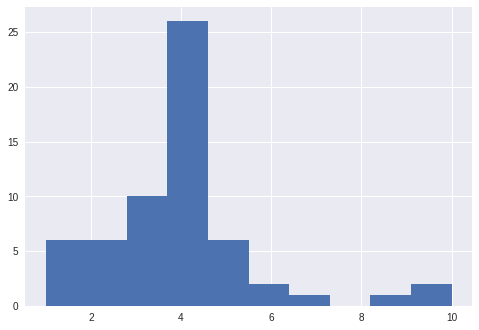

In [79]:
cm = pd.DataFrame(confusion_matrix(Result['multi_class'],Result['rnn_pred']))
#sns.heatmap(cm.div(cm.sum(1)))
Result[Result.multi_class==6]['rnn_pred'].hist()

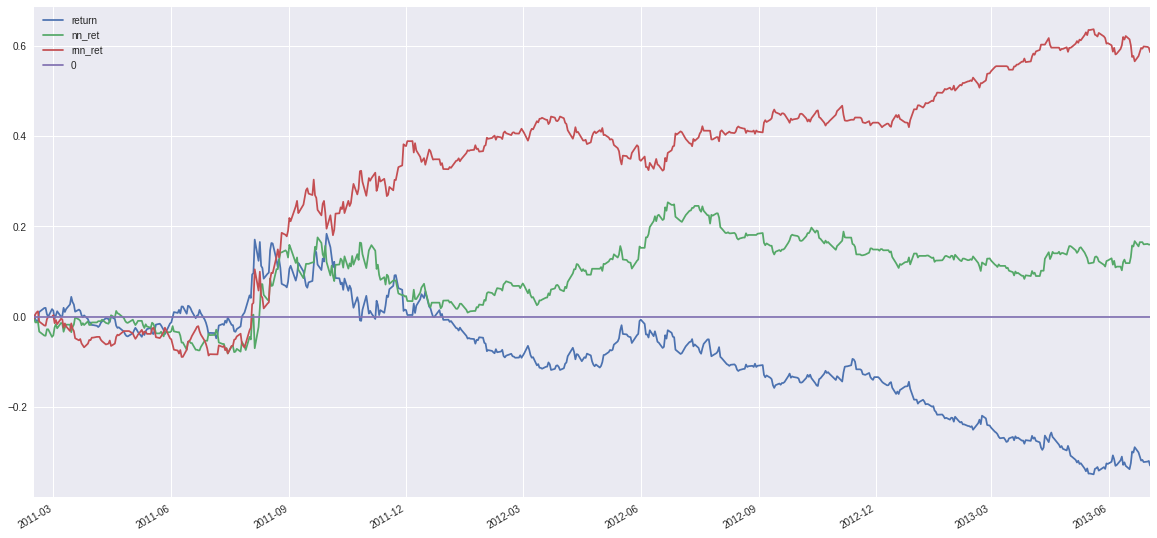

In [80]:
Res = (Result[-test_size:][['return','nn_ret','rnn_ret']]).cumsum()
Res[0] =0
Res.plot(figsize=(20,10))

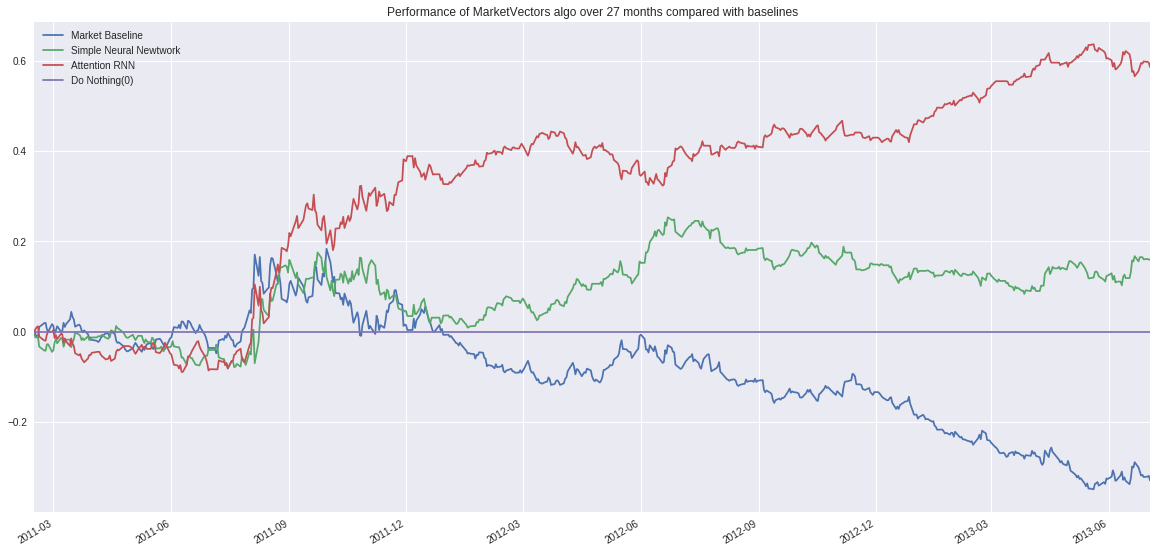

In [81]:
Res.columns =['Market Baseline','Simple Neural Newtwork','Attention RNN','Do Nothing(0)']
Res.plot(figsize=(20,10),title="Performance of MarketVectors algo over 27 months compared with baselines")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86945372b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f86921b1c18>]], dtype=object)

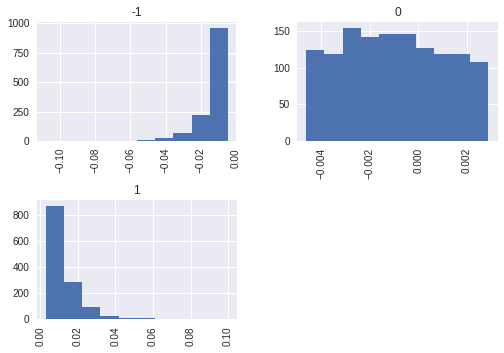

In [82]:
Labeled.hist(column='return',by='class')

In [83]:
Result['class'].unique()

array([ 1, -1,  0])

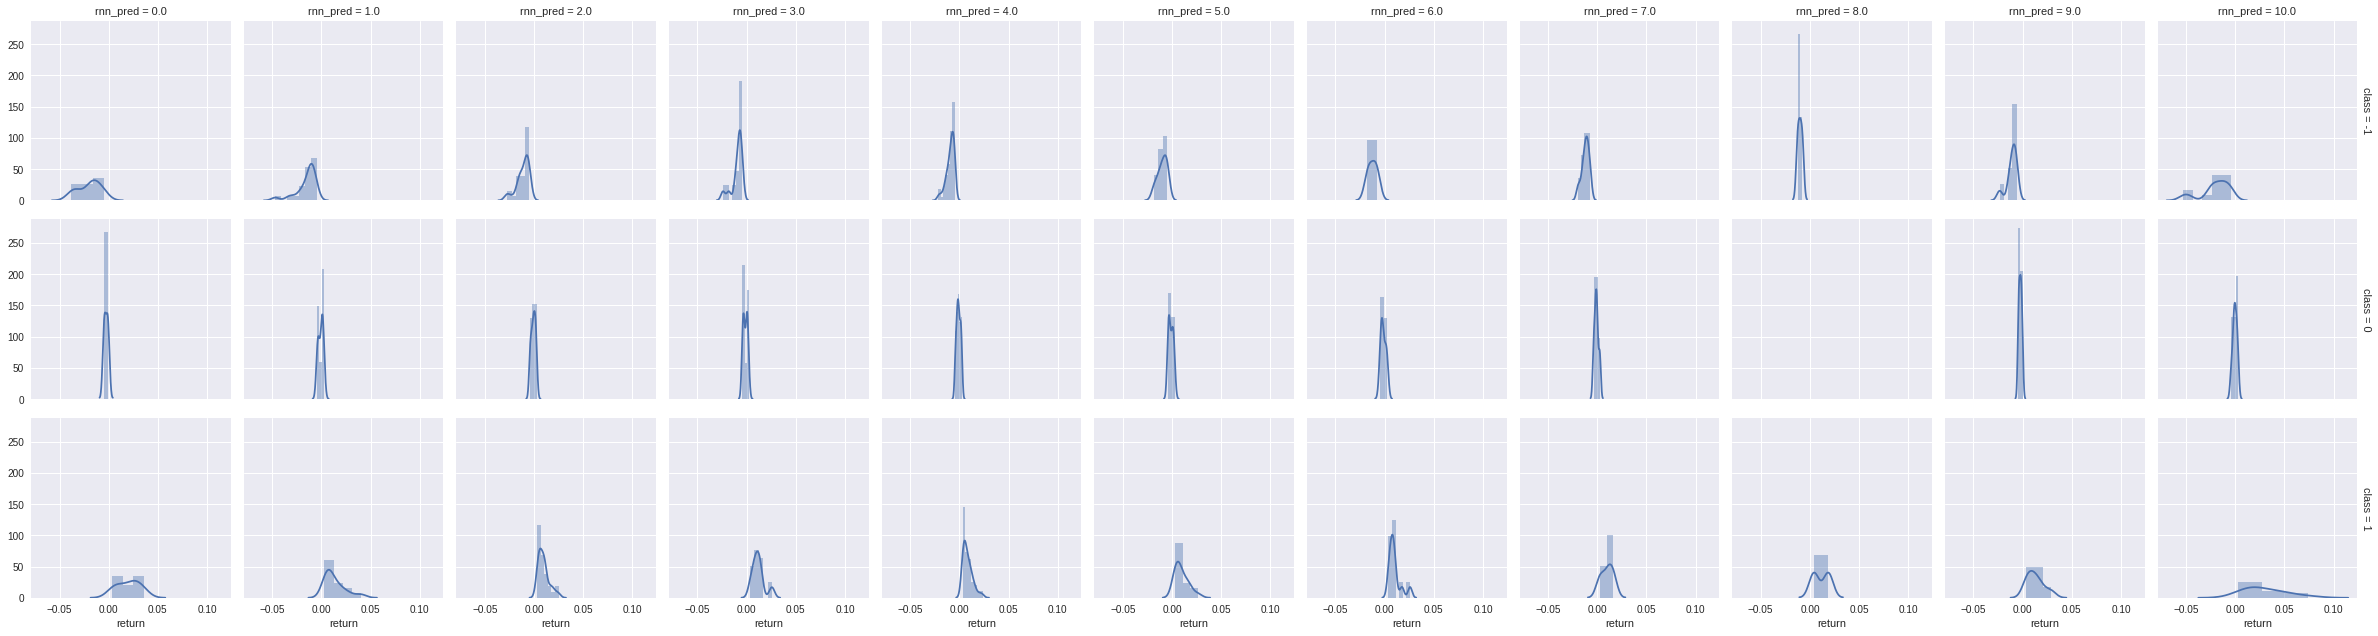

In [84]:
import seaborn as sns
g = sns.FacetGrid(Result, row="class", col="rnn_pred", margin_titles=True)
g.map(sns.distplot, "return",);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8691e5e710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f86a45329e8>]], dtype=object)

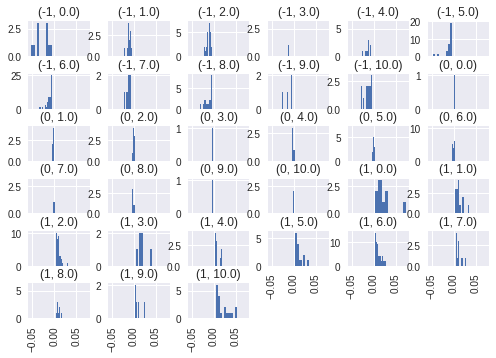

In [85]:
Result.hist(by=['class','nn_pred'],column='return',sharex=True)

In [ ]:
Result.index.dayofweek